In [168]:
import pandas as pd
import numpy as np
import os
import json
import datetime
from tqdm import tqdm
import matplotlib.pyplot as plt
import statsmodels.api as sm
import string
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import random
from sklearn.feature_extraction import text
import nltk
from nltk.corpus import stopwords
from string import punctuation
from nltk import pos_tag
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

In [68]:
folder_path = "../ECE219_tweet_data/"
files= os.listdir(folder_path)
print(files)

['tweets_#nfl.txt', 'tweets_#superbowl.txt', 'tweets_#sb49.txt', 'tweets_#patriots.txt', 'tweets_#gohawks.txt', 'tweets_#gopatriots.txt']


In [69]:
data={}
a = []
for file_ in files:
    location=[]
    text=[]

    key = file_[7:-4]
    with open(folder_path + file_, encoding="utf8") as f:
        print("Starting for",key)
        for line in tqdm(f):
            tweet = json.loads(line,strict=False)
            location.append(tweet['tweet']['user']['location'])
            text.append(tweet['tweet']['text'])
    
    data = {'location':location,
                'text':text}
    print("done for",key)
    a.append(pd.DataFrame.from_dict(data))       
dfs = pd.concat(a)

2648it [00:00, 12493.85it/s]

Starting for #nfl


233022it [00:16, 13787.82it/s]
1091it [00:00, 10906.81it/s]

done for #nfl
Starting for #superbowl


1213813it [01:24, 14392.52it/s]


done for #superbowl


878it [00:00, 8770.70it/s]

Starting for #sb49


743649it [00:48, 15296.26it/s]
0it [00:00, ?it/s]

done for #sb49
Starting for #patriots


440621it [00:32, 13521.68it/s]
1288it [00:00, 12872.55it/s]

done for #patriots
Starting for #gohawks


169122it [00:11, 15324.61it/s]
1423it [00:00, 14226.72it/s]

done for #gohawks
Starting for #gopatriots


23511it [00:01, 15051.27it/s]


done for #gopatriots


In [70]:
dfs

,location,text
0,,Who do you have?!?! #nfl #NFLPlayoffs #Packers...
1,Fine Art America,http://t.co/H5JADypiEB #billbelichick #NFL #NF...
2,"Seattle, WA",One more week until the #Seahawks begin the #N...
3,"Virginia Beach, Va",We have NFLSHOP on our site! 3% cash back and ...
4,"Cheshire, CT","Most @SuperBowl wins: #Steelers (6), #49ers &a..."
5,"Cheshire, CT","Most @SuperBowl losses: #Broncos (5), #Patriot..."
6,"Seattle, WA",@Seahawks Sonics fans are in! #ImIn #NFLPlayo...
7,,#gohawks #12thman #nfl #ninernation #49ers #go...
8,,Who is the better QB?\n\nRT- Joe Montana\n\nFA...
9,Seattle,Reppin' for my #Seahawks 🏈 #NFLPlayoffs #GoHaw...


In [71]:
mass=set(["boston","bellevue","masachusettes","mass","ma","springfield","gillette"])
mass

{'bellevue',
 'boston',
 'gillette',
 'ma',
 'masachusettes',
 'mass',
 'springfield'}

In [72]:
washington=set(["seattle","washington","wa","kirkland","spokane","redmond","centurylink"])
washington

{'centurylink',
 'kirkland',
 'redmond',
 'seattle',
 'spokane',
 'wa',
 'washington'}

In [73]:
table = str.maketrans(dict.fromkeys(string.punctuation))

In [74]:
dfs['location']=dfs['location'].apply(lambda x: x.lower())
dfs['location']=dfs['location'].apply(lambda x: x.translate(table))

In [75]:
dfs

,location,text
0,,Who do you have?!?! #nfl #NFLPlayoffs #Packers...
1,fine art america,http://t.co/H5JADypiEB #billbelichick #NFL #NF...
2,seattle wa,One more week until the #Seahawks begin the #N...
3,virginia beach va,We have NFLSHOP on our site! 3% cash back and ...
4,cheshire ct,"Most @SuperBowl wins: #Steelers (6), #49ers &a..."
5,cheshire ct,"Most @SuperBowl losses: #Broncos (5), #Patriot..."
6,seattle wa,@Seahawks Sonics fans are in! #ImIn #NFLPlayo...
7,,#gohawks #12thman #nfl #ninernation #49ers #go...
8,,Who is the better QB?\n\nRT- Joe Montana\n\nFA...
9,seattle,Reppin' for my #Seahawks 🏈 #NFLPlayoffs #GoHaw...


In [76]:
dfs['text']=dfs['text'].apply(lambda x: x.lower())

In [77]:
dfs

,location,text
0,,who do you have?!?! #nfl #nflplayoffs #packers...
1,fine art america,http://t.co/h5jadypieb #billbelichick #nfl #nf...
2,seattle wa,one more week until the #seahawks begin the #n...
3,virginia beach va,we have nflshop on our site! 3% cash back and ...
4,cheshire ct,"most @superbowl wins: #steelers (6), #49ers &a..."
5,cheshire ct,"most @superbowl losses: #broncos (5), #patriot..."
6,seattle wa,@seahawks sonics fans are in! #imin #nflplayo...
7,,#gohawks #12thman #nfl #ninernation #49ers #go...
8,,who is the better qb?\n\nrt- joe montana\n\nfa...
9,seattle,reppin' for my #seahawks 🏈 #nflplayoffs #gohaw...


In [78]:
dfs['text'].str.contains('#superbowl')

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
23481     True
23482    False
23483     True
23484     True
23485    False
23486     True
23487     True
23488     True
23489     True
23490     True
23491    False
23492     True
23493    False
23494     True
23495     True
23496    False
23497     True
23498     True
23499     True
23500    False
23501    False
23502    False
23503    False
23504    False
23505     True
23506     True
23507     True
23508    False
23509     True
23510    False
Name: text, Length: 2823738, dtype: bool

In [79]:
dfs=dfs[dfs['text'].str.contains('#superbowl')]

In [80]:
dfs

,location,text
34,,já somos mais de 80 confirmados para assistir ...
36,,"randall cunningham collection, vintage jerseys..."
54,washington,interview with the seattle seahawks superbowl ...
59,souf london,just recalled that #superbowlxlix is next mont...
193,holsworthy sydney australia,#conferencechampionships #nflplayoffs #gbvssea...
213,niagara fallson,@softstarshoes is giving away free moccasins i...
246,,@softstarshoes is giving away free moccasins i...
252,,@softstarshoes is giving away free moccasins i...
255,,check out #larrybird #jeromebettis #baseball #...
265,los angeles,@softstarshoes is giving away free moccasins i...


In [81]:
dfs.drop_duplicates(inplace=True)
len(dfs)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


1199402

In [82]:
dfs['location'].replace('', np.nan, inplace=True)

In [83]:
dfs=dfs.dropna(axis=0)

In [84]:
dfs

,location,text
54,washington,interview with the seattle seahawks superbowl ...
59,souf london,just recalled that #superbowlxlix is next mont...
193,holsworthy sydney australia,#conferencechampionships #nflplayoffs #gbvssea...
213,niagara fallson,@softstarshoes is giving away free moccasins i...
265,los angeles,@softstarshoes is giving away free moccasins i...
280,tokyo japan,i'd take a day off on feb 2 if the #patriots a...
336,london leeds southampton,watch the #superbowlxlix on 1st feb on our big...
396,dogtown,the 2015 super bowl is here! get tickets now a...
413,arizona,reebok nfl super bowl xl detroit 2006 adjustab...
419,washington,interview with the seattle seahawks superbowl ...


In [85]:
dfs = dfs.reset_index(drop=True)

In [86]:
dfs

,location,text
0,washington,interview with the seattle seahawks superbowl ...
1,souf london,just recalled that #superbowlxlix is next mont...
2,holsworthy sydney australia,#conferencechampionships #nflplayoffs #gbvssea...
3,niagara fallson,@softstarshoes is giving away free moccasins i...
4,los angeles,@softstarshoes is giving away free moccasins i...
5,tokyo japan,i'd take a day off on feb 2 if the #patriots a...
6,london leeds southampton,watch the #superbowlxlix on 1st feb on our big...
7,dogtown,the 2015 super bowl is here! get tickets now a...
8,arizona,reebok nfl super bowl xl detroit 2006 adjustab...
9,washington,interview with the seattle seahawks superbowl ...


In [87]:
dfs['label'] = 0
dfs

,location,text,label
0,washington,interview with the seattle seahawks superbowl ...,0
1,souf london,just recalled that #superbowlxlix is next mont...,0
2,holsworthy sydney australia,#conferencechampionships #nflplayoffs #gbvssea...,0
3,niagara fallson,@softstarshoes is giving away free moccasins i...,0
4,los angeles,@softstarshoes is giving away free moccasins i...,0
5,tokyo japan,i'd take a day off on feb 2 if the #patriots a...,0
6,london leeds southampton,watch the #superbowlxlix on 1st feb on our big...,0
7,dogtown,the 2015 super bowl is here! get tickets now a...,0
8,arizona,reebok nfl super bowl xl detroit 2006 adjustab...,0
9,washington,interview with the seattle seahawks superbowl ...,0


In [88]:
idx=[]
for row in dfs.iterrows():
    inter_wash=set(row[1]['location'].split(" ")).intersection(washington)
    inter_mass=set(row[1]['location'].split(" ")).intersection(mass)
    #print(len(inter_wash))
    #print(len(inter_mass))
    if len(inter_mass)==0 and len(inter_wash)==0:
        idx.append(row[0])
    elif len(inter_mass)>0:
        print(row[0])
        dfs['label'][row[0]]=0      #massachusette=0; washington=1
    else:
        dfs['label'][row[0]]=1
        
        
        
        
     

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


76


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


236
303
370
382
431
458
572
605
785
890
1109
1130
1192
1351
1358
1383
1430
1439
1442
1447
1449
1451
1473
1498
1514
1522
1527
1536
1561
1612
1635
1636
1645
1733
1787
1845
1855
1862
1863
1881
1915
1918
1921
1950
1952
1975
1978
1989
2134
2170
2185
2208
2229
2250
2253
2266
2284
2336
2344
2384
2600
2661
2697
2715
2780
2782
2836
2849
2960
2963
2969
2970
3015
3043
3097
3160
3182
3213
3220
3298
3301
3317
3332
3338
3340
3367
3378
3404
3410
3425
3433
3436
3720
3760
3777
3786
3790
3937
3956
3967
3985
3986
4010
4011
4032
4044
4100
4214
4338
4346
4347
4363
4385
4392
4399
4400
4401
4413
4422
4424
4451
4482
4655
4656
4720
4722
4747
4820
4826
4838
4889
4892
4893
4920
4929
4938
4956
4975
5006
5054
5085
5091
5092
5093
5123
5143
5197
5199
5235
5272
5307
5331
5338
5360
5374
5430
5432
5433
5450
5506
5531
5545
5549
5632
5682
5712
5719
5752
5757
5768
5769
5780
5835
5847
5892
5903
5906
5922
5927
5998
6031
6032
6045
6069
6133
6159
6198
6201
6304
6311
6313
6376
6386
6406
6412
6432
6473
6542
6578
6647
6662
6668


53163
53168
53184
53191
53202
53213
53220
53250
53254
53255
53283
53308
53320
53322
53329
53331
53335
53339
53340
53346
53351
53360
53366
53368
53370
53379
53382
53389
53393
53395
53398
53426
53455
53467
53469
53478
53487
53494
53510
53514
53519
53559
53562
53595
53598
53623
53625
53635
53645
53662
53678
53681
53710
53718
53732
53737
53763
53782
53799
53803
53820
53833
53836
53849
53862
53884
53905
53911
53927
53945
53950
53986
53994
53995
54003
54007
54018
54037
54047
54054
54057
54064
54067
54075
54076
54092
54104
54124
54125
54151
54161
54163
54166
54169
54187
54209
54211
54213
54225
54239
54246
54299
54300
54337
54348
54367
54384
54392
54401
54426
54429
54433
54437
54439
54441
54459
54463
54470
54484
54498
54504
54512
54515
54517
54527
54533
54536
54576
54606
54608
54617
54630
54638
54641
54642
54657
54665
54680
54682
54729
54734
54743
54752
54777
54809
54821
54872
54875
54902
54904
54950
54957
54963
54986
54988
54996
55006
55015
55021
55073
55078
55087
55092
55093
55097
55101
5511

86513
86563
86576
86605
86631
86655
86669
86681
86695
86778
86779
86789
86813
86830
86843
86845
86863
86865
86885
86916
86972
87040
87072
87091
87096
87161
87193
87210
87220
87258
87351
87355
87356
87359
87397
87403
87408
87419
87484
87509
87537
87553
87727
87838
87839
87861
87862
87873
88043
88049
88095
88123
88150
88160
88189
88256
88265
88348
88360
88377
88399
88470
88511
88527
88535
88541
88557
88570
88572
88585
88588
88623
88641
88698
88720
88787
88818
88868
88905
88906
88917
88954
88963
88970
89125
89312
89447
89464
89519
89548
89565
89574
89601
89627
89645
89677
89679
89681
89682
89698
89794
89813
89821
89840
89843
89871
89880
89920
89925
89949
89984
89995
89997
90013
90051
90097
90120
90122
90150
90171
90174
90189
90286
90303
90328
90374
90382
90390
90398
90407
90423
90429
90476
90478
90521
90537
90543
90562
90591
90599
90681
90707
90726
90727
90768
90791
90829
90843
90844
90852
90855
90878
90882
90897
90902
90939
90959
90966
90979
90988
90991
91002
91019
91038
91039
91043
9104

123183
123194
123260
123287
123291
123298
123312
123318
123319
123321
123330
123540
123569
123600
123621
123652
123671
123683
123726
123755
123783
123799
123804
123816
123871
123898
123910
123921
123937
123938
123950
123960
123963
123964
124084
124093
124139
124141
124142
124162
124185
124235
124256
124300
124308
124391
124434
124478
124479
124617
124634
124661
124674
124695
124732
124733
124745
124776
124777
124787
124795
124864
124951
124977
124981
125014
125032
125060
125079
125099
125100
125112
125220
125225
125243
125286
125301
125302
125312
125343
125358
125366
125414
125467
125480
125545
125572
125615
125637
125663
125684
125708
125737
125812
125858
125859
125867
125895
125905
125911
125914
125921
125975
125989
126003
126077
126085
126086
126139
126172
126210
126229
126249
126258
126264
126308
126342
126412
126513
126520
126528
126546
126557
126560
126580
126652
126668
126687
126738
126777
126783
126795
126851
126875
126892
126925
126973
127036
127107
127113
127114
127116
127185

161815
161860
161909
161941
161948
161984
162022
162024
162031
162075
162104
162112
162122
162152
162160
162163
162186
162194
162262
162331
162336
162362
162370
162381
162461
162492
162500
162531
162588
162651
162654
162661
162662
162688
162766
162768
162771
162772
162788
162812
162863
162898
162962
162970
163020
163044
163098
163112
163134
163140
163238
163307
163352
163362
163411
163477
163479
163500
163624
163630
163636
163735
163742
163743
163764
163767
163775
163787
163790
163809
163832
163837
163839
163868
163883
163894
163898
163902
163905
163908
163917
163926
163930
163933
163934
163940
163964
163974
164020
164049
164078
164090
164097
164118
164156
164177
164179
164193
164204
164227
164247
164289
164350
164403
164461
164467
164538
164581
164610
164613
164633
164677
164690
164699
164709
164771
164776
164811
164857
164865
164889
164905
164948
164965
165016
165058
165060
165091
165099
165128
165210
165313
165378
165438
165520
165542
165562
165607
165612
165617
165625
165643
165687

205024
205036
205050
205053
205055
205066
205076
205117
205199
205279
205377
205400
205451
205456
205512
205535
205537
205552
205591
205606
205616
205805
205827
205906
205929
205950
206011
206025
206052
206057
206116
206130
206151
206241
206246
206276
206307
206347
206429
206511
206545
206549
206587
206618
206637
206680
206699
206705
206736
206805
206819
206841
206897
206921
206939
206980
206989
207025
207108
207126
207203
207227
207231
207276
207287
207317
207409
207425
207481
207492
207493
207527
207561
207563
207589
207771
207841
207844
207887
207896
208016
208019
208092
208130
208147
208157
208210
208215
208220
208383
208415
208454
208532
208537
208575
208620
208636
208693
208750
208815
208822
208851
208853
208882
208896
208921
208949
208980
209014
209122
209173
209195
209217
209244
209245
209264
209270
209271
209272
209327
209355
209378
209384
209403
209414
209553
209622
209636
209640
209736
209750
209780
209838
209920
209946
209959
210099
210172
210180
210273
210310
210364
210429

269334
269366
269427
269551
269602
269705
269769
269789
269796
269837
269872
269875
269877
269883
269903
270068
270223
270312
270328
270422
270443
270584
270590
270621
270722
270802
270912
270955
271012
271077
271083
271111
271195
271219
271271
271286
271341
271495
271544
271548
271553
271654
271732
271907
272059
272090
272152
272416
272569
272571
272642
272662
272716
272946
273024
273035
273161
273195
273221
273298
273447
273455
273474
273556
273601
273612
273684
273782
273921
273950
274017
274061
274075
274094
274117
274125
274228
274611
274711
274837
274921
274927
274934
274951
275047
275171
275243
275421
275424
275435
275437
275484
275543
275550
275572
275630
275704
275729
275733
275820
275827
275934
276041
276089
276154
276228
276229
276330
276357
276511
276583
276600
276678
276679
276755
276831
276833
276945
276960
277017
277031
277045
277064
277106
277219
277284
277370
277383
277475
277603
277690
277786
277850
277914
278188
278203
278273
278309
278344
278561
278614
278636
278648

344785
344811
344893
344956
344966
345046
345070
345166
345192
345462
345469
345521
345608
345660
345675
345818
346013
346123
346151
346318
346374
346382
346425
346522
346586
346627
346771
346806
346835
347048
347112
347167
347172
347174
347275
347338
347370
347386
347513
347518
347565
347576
347583
347645
347696
347716
347773
347839
347872
347902
348014
348120
348147
348167
348211
348425
348445
348531
348617
348640
348660
348733
348773
348847
348915
348945
349232
349275
349302
349383
349419
349703
349720
349745
349797
349868
349905
349907
349935
349978
349981
350012
350142
350165
350243
350338
350340
350355
350430
350518
350557
350629
350652
350664
350711
350720
350751
350832
350848
350905
350939
351018
351020
351156
351196
351394
351531
351710
351717
351759
351773
351813
351842
351861
351893
351932
351969
352105
352115
352138
352165
352205
352207
352309
352335
352355
352632
352675
352676
352687
352719
352729
352830
352833
352836
352843
352884
352908
352936
352950
352970
353005
353032

405375
405451
405482
405497
405550
405573
405593
405626
405707
405747
405821
405877
405883
405886
405896
405902
405999
406024
406158
406222
406245
406270
406272
406318
406358
406382
406433
406464
406470
406473
406520
406523
406572
406605
406613
406655
406664
406700
406727
406733
406774
406809
406957
407001
407011
407013
407091
407107
407410
407433
407482
407532
407630
407663
407723
407741
407857
407933
408026
408045
408050
408051
408145
408222
408239
408331
408357
408407
408486
408644
408655
408713
408848
408928
409051
409054
409060
409110
409156
409366
409398
409426
409521
409630
409631
409646
409672
409723
409724
409738
409750
409807
409864
409893
410010
410037
410181
410192
410208
410289
410316
410337
410464
410551
410635
410754
410771
410880
410975
411082
411098
411102
411207
411390
411433
411483
411677
411896
411977
412045
412190
412219
412284
412370
412438
412498
412632
412633
412710
412720
412750
412756
412761
412819
412840
412863
412873
412929
412986
413106
413131
413178
413280

472777
472793
472876
472902
472989
473045
473174
473179
473212
473379
473438
473689
473803
473841
473873
473996
474087
474149
474151
474179
474203
474302
474465
474721
475050
475106
475117
475136
475575
475587
475589
475608
475766
475776
475810
475885
475917
476027
476111
476265
476805
476835
476900
477093
477197
477397
477421
477459
477815
478008
478049
478057
478111
478189
478199
478302
478605
478669
478803
478891
479236
479242
479409
479489
479513
479606
479657
479727
479754
479817
479881
479917
479985
480002
480221
480228
480244
480418
480462
480665
480876
480933
481001
481050
481234
481420
481449
481482
481517
481575
481698
482098
482292
482415
482422
482429
482546
482572
482606
482632
482680
482739
482903
482970
483038
483054
483165
483310
483315
483352
483513
483660
483728
483747
483927
483960
483964
483969
484052
484325
484381
484404
484488
484535
484624
484792
484981
485188
485235
485639
485714
485825
485893
485907
485952
486008
486099
486114
486186
486189
486503
486540
486661

557016
557188
557514
557517
557585
557590
557625
557635
557659
557682
557965
558020
558022
558125
558195
558344
558643
558705
558800
558941
559114
559189
559212
559227
559261
559302
559390
559461
559487
559522
559536
559608
559615
559715
559762
559822
559858
559866
559868
559892
559994
560069
560095
560303
560478
560528
560542
560590
560637
560689
560718
560809
560848
560861
560871
560947
561046
561073
561106
561196
561273
561289
561294
561380
561409
561469
561561
561646
561685
561782
561840
561889
562038
562041
562097
562180
562244
562256
562259
562347
562430
562451
562453
562612
562625
562646
562732
562785
562816
563038
563129
563282
563286
563318
563387
563549
563694
563840
563914
564000
564001
564298
564367
564461
564492
564550
564592
564623
564764
564822
564831
564918
564930
564990
565030
565125
565129
565131
565214
565410
565444
565461
565492
565585
565755
565791
565840
565944
566017
566027
566057
566184
566214
566245
566255
566500
566513
566611
566665
566671
566706
566765
566974

645339
645467
645559
645660
645692
645733
645763
645798
645874
645960
645974
646134
646241
646263
646382
646432
646449
646482
646519
646631
646782
647018
647049
647056
647090
647092
647214
647304
647308
647504
647551
647569
647685
647773
647775
647797
647811
647827
647842
647969
647978
648016
648059
648081
648267
648355
648371
648466
648471
648528
648556
648577
648849
648969
649011
649016
649197
649311
649516
649597
649610
649731
649752
649796
649949
650079
650114
650129
650187
650296
650310
650337
650365
650497
650654
650665
650672
650817
650927
651343
651356
651401
651459
651500
651516
651548
651603
651655
651779
651850
651901
651927
651995
652057
652065
652105
652336
652423
652516
652561
652612
652651
652743
652759
652813
652839
652910
652932
653046
653052
653069
653097
653116
653128
653330
653339
653345
653377
653402
653411
653426
653452
653558
653935
653982
654078
654225
654264
654293
654314
654459
654537
654574
654580
654585
654619
654698
654793
654837
654845
654962
654986
655018

715262
715275
715329
715372
715382
715412
715449
715450
715639
715766
715789
715818
715831
715850
715851
715869
715903
715935
715967
715973
715974
716001
716042
716282
716339
716344
716385
716479
716521
716572
716598
716607
716611
716635
716676
716802
716814
716835
716849
716871
716959
717022
717036
717058
717206
717229
717277
717313
717439
717453
717510
717546
717581
717604
717724
717757
717795
717806
717809
717817
717934
718070
718133
718197
718262
718325
718343
718382
718435
718441
718479
718495
718549
718716
718724
718730
718779
718846
718927
718936
718969
718993
719058
719134
719196
719199
719221
719272
719383
719463
719491
719551
719558
719559
719571
719631
719632
719640
719667
719668
719773
719775
719848
720052
720102
720150
720178
720225
720270
720301
720347
720359
720407
720413
720484
720510
720574
720595
720659
720714
720726
720766
720844
720851
720901
720984
721023
721104
721138
721145
721189
721255
721390
721420
721489
721494
721501
721524
721590
721598
721619
721689
721691

780387
780490
780502
780566
780625
780681
780683
780686
780687
780755
780757
780835
780840
780881
781082
781098
781142
781145
781150
781217
781339
781424
781504
781506
781511
781592
781607
781714
781716
781729
781774
781822
781926
781956
781985
782002
782033
782066
782089
782106
782176
782235
782245
782260
782265
782396
782425
782441
782485
782536
782590
782615
782623
782627
782648
782657
782738
782804
782807
782939
782976
782994
783047
783088
783093
783108
783158
783199
783208
783212
783323
783334
783360
783369
783373
783422
783436
783464
783519
783535
783572
783646
783651
783663
783680
783693
783742
783757
783764
783782
783806
783808
783819
783851
783904
783948
783961
784022
784066
784087
784178
784199
784234
784245
784257
784281
784358
784417
784434
784527
784529
784547
784598
784606
784613
784698
784711
784731
784747
784752
784755
784890
784908
784913
784921
784925
785029
785127
785131
785161
785247
785249
785266
785351
785397
785438
785487
785510
785542
785564
785581
785591
785606

818722
818746
818816
818829
818830
818895
818917
818958
818961
818982
818988
819012
819036
819053
819070
819085
819162
819165
819182
819200
819201
819234
819252
819253
819257
819261
819284
819302
819332
819338
819366
819429
819459
819463
819480
819519
819535
819547
819623
819650
819664
819675
819713
819742
819830
819844
819852
819873
819874
819880
819882
819909
819917
819929
819933
819998
820024
820051
820055
820069
820070
820205
820210
820216
820233
820252
820333
820369
820380
820383
820405
820428
820487
820503
820554
820595
820609
820620
820639
820642
820650
820723
820726
820730
820740
820745
820760
820793
820826
820846
820876
820901
820913
820955
820998
821074
821102
821167
821176
821204
821251
821259
821265
821271
821295
821345
821354
821368
821373
821382
821419
821425
821435
821489
821504
821517
821529
821557
821579
821585
821595
821599
821615
821619
821644
821655
821661
821664
821696
821726
821746
821748
821765
821787
821789
821790
821801
821802
821830
821838
821864
821867
821906

845985
845987
846003
846011
846053
846101
846224
846360
846369
846379
846480
846497
846523
846525
846845
846851
846871
846884
846944
846952
847014
847062
847140
847166
847200
847221
847242
847337
847442
847449
847570
847584
847642
847710
847929
848006
848052
848171
848198
848209
848241
848273
848276
848298
848395
848406
848415
848431
848435
848454
848461
848464
848481
848512
848532
848550
848604
848677
848709
848710
848750
848757
848808
848813
848818
848822
848849
848863
848935
848966
848991
849003
849087
849143
849187
849271
849273
849278
849298
849357
849403
849407
849430
849467
849512
849595
849644
849683
849690
849702
849706
849756
849771
849800
849823
849905
849920
850027
850090
850177
850261
850281
850302
850312
850429
850523
850577
850599
850649
850664
850732
850883
850905
850917
850957
851033
851056
851238
851375
851377
851435
851525
851594
851611
851620
851651
851685
851690
851751
851766
851773
851967
851980
851986
852020
852027
852108
852169
852178
852242
852249
852332
852491

In [89]:
print(len(idx))

839061


In [90]:
dfs=dfs.drop(idx, axis=0)
dfs

,location,text,label
0,washington,interview with the seattle seahawks superbowl ...,1
9,washington,interview with the seattle seahawks superbowl ...,1
30,in the moment washington,completely ok with being called an insufferabl...,1
40,seattle las vegas,in #honor of #seattle #seahawks last #nfl #pla...,1
70,washington state,#nfl #nflplayoffs #superbowl49 #superbowlchamp...,1
76,springfield ma,can't we just kick this thing off now? this #p...,0
107,seattle wa,@softstarshoes is giving away free moccasins i...,1
122,washington,bam bam kam!! part of the #lob #nflplayoffs #s...,1
130,wa state,@softstarshoes is giving away free moccasins i...,1
207,tacoma wa,you know what time it is. seahawks cake....\n\...,1


In [91]:
dfs

,location,text,label
0,washington,interview with the seattle seahawks superbowl ...,1
9,washington,interview with the seattle seahawks superbowl ...,1
30,in the moment washington,completely ok with being called an insufferabl...,1
40,seattle las vegas,in #honor of #seattle #seahawks last #nfl #pla...,1
70,washington state,#nfl #nflplayoffs #superbowl49 #superbowlchamp...,1
76,springfield ma,can't we just kick this thing off now? this #p...,0
107,seattle wa,@softstarshoes is giving away free moccasins i...,1
122,washington,bam bam kam!! part of the #lob #nflplayoffs #s...,1
130,wa state,@softstarshoes is giving away free moccasins i...,1
207,tacoma wa,you know what time it is. seahawks cake....\n\...,1


In [92]:
y_true=dfs['label']
dfs = dfs.drop(['label'],axis=1)
dfs = dfs.drop(['location'], axis = 1)

In [93]:
dfs

,text
0,interview with the seattle seahawks superbowl ...
9,interview with the seattle seahawks superbowl ...
30,completely ok with being called an insufferabl...
40,in #honor of #seattle #seahawks last #nfl #pla...
70,#nfl #nflplayoffs #superbowl49 #superbowlchamp...
76,can't we just kick this thing off now? this #p...
107,@softstarshoes is giving away free moccasins i...
122,bam bam kam!! part of the #lob #nflplayoffs #s...
130,@softstarshoes is giving away free moccasins i...
207,you know what time it is. seahawks cake....\n\...


In [94]:
def create_stopwords():
    """stop_words_skt = text.ENGLISH_STOP_WORDS
    # nltk.download('stopwords')
    stop_words_en = stopwords.words('english')

    print("# of stop_words_skt:\t\t %s" % len(stop_words_skt))
    print("# of stop_words_en:\t\t %s" % len(stop_words_en))

    print("# of punctuation:\t\t %s" % len(punctuation))
    combined_stopwords = set.union(set(stop_words_en),set(punctuation),set(stop_words_skt))
    print("# of combined_stopwords:\t %s" % len(combined_stopwords))"""
    combined_stopwords=set(punctuation)
    return combined_stopwords

In [95]:

nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')
combined_stopwords = create_stopwords()
analyzer = CountVectorizer().build_analyzer()
wnl = nltk.wordnet.WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shrutisharan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/shrutisharan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shrutisharan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shrutisharan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [96]:
count_vect = CountVectorizer(min_df=3,analyzer='word', stop_words= 'english')
X_counts = count_vect.fit_transform(dfs['text'])
print(X_counts.shape)
# print(count_vect.get_feature_names())


# Calculating the TF-IDF matrix for train and test data
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)
print(X_tfidf.shape)


(45607, 9516)
(45607, 9516)


In [116]:
from sklearn.decomposition import TruncatedSVD
def dimension_reduction_SVD(X_tfidf):
    svd = TruncatedSVD(n_components=50)
    X_reduced = svd.fit_transform(X_tfidf)
    return X_reduced

In [117]:
X_reduced_svd = dimension_reduction_SVD(X_tfidf)

In [174]:
def get_metrics(y_true,y_pred,y_prob,title):
    acc_sc=accuracy_score(y_true,y_pred)
    pr=precision_score(y_true,y_pred)
    r=recall_score(y_true,y_pred)
    cfm=confusion_matrix(y_true,y_pred)
    print("Accuracy",acc_sc)
    print("Precision",pr)
    print("Recall",r)
    plot_roc_curve(y_true,y_prob,title)
    plot_confusion_matrix(y_true,y_pred,title)

In [160]:
Labels=["Massachusetts","Washington"]

In [179]:
import itertools

def plot_roc_curve(actual, predicted, title):
    x, y, _ = roc_curve(actual, predicted)
    roc_auc = auc(x,y)
    
    fig, ax = plt.subplots()
    ax.set_title("ROC Curve: %s" % title)
    ax.grid(color='0.7', linestyle='--', linewidth=1)
    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)
    ax.plot(x, y, lw=2, label='Area under curve = %0.4f' % roc_auc)
    ax.plot([0,1], [0,1], linestyle='--', color='orange')
    ax.legend(loc="best")
    plt.show()
    
def plot_confusion_matrix(actual, predicted, title, classes = Labels):
    cm = confusion_matrix(actual, predicted)
    plt.figure()
    plt.grid(False)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix: %s" % title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [162]:
X_train,X_test,y_train,y_test=train_test_split(X_reduced_svd, y_true, test_size=0.10, random_state=42)

In [163]:
model= MLPClassifier()
clf=model.fit(X_train,y_train)
y_pred=clf.predict(X_test)
y_prob=clf.predict_proba(X_test)[:,1]


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy 0.736899802674852
Precision 0.7351351351351352
Recall 0.8630085852930198


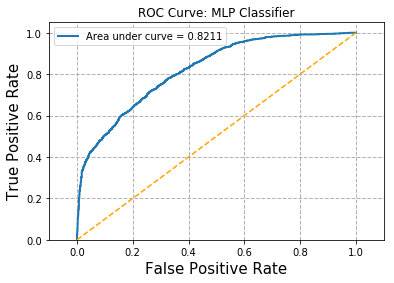

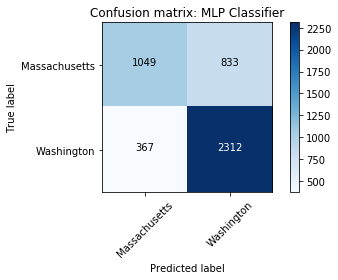

In [180]:
get_metrics(y_test,y_pred,y_prob,"MLP Classifier")

In [182]:
model= LogisticRegression()
clf=model.fit(X_train,y_train)
y_pred=clf.predict(X_test)
y_prob=clf.predict_proba(X_test)[:,1]

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy 0.7314185485639114
Precision 0.7058323895809739
Recall 0.9305711086226204


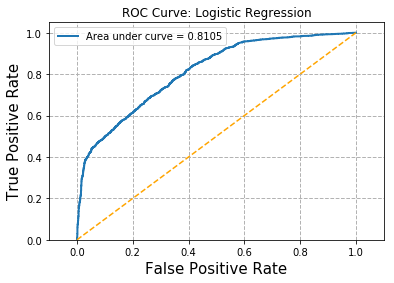

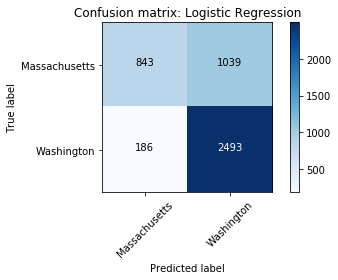

In [183]:
get_metrics(y_test,y_pred,y_prob,"Logistic Regression")

In [125]:
model= RandomForestClassifier()
clf=model.fit(X_train,y_train)
y_pred=clf.predict(X_test)
y_prob=clf.predict_proba(X_test)[:,1]

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy 0.7314185485639114
Precision 0.7058323895809739
Recall 0.9305711086226204


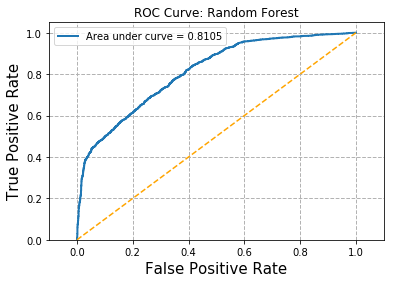

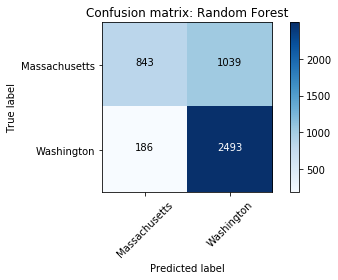

In [184]:
get_metrics(y_test,y_pred,y_prob,"Random Forest")